In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import funkcje as f


path = os.path.abspath("dane")
rate2016_df = pd.read_csv(os.path.join(path, "Rate2016.csv"))
rate2015_df = pd.read_csv(os.path.join(path, "Rate2015.csv"))
rate2014_df = pd.read_csv(os.path.join(path, "Rate2014.csv"))
network_df = pd.read_csv(os.path.join(path, "Network.csv"))
pa_df = pd.read_csv(os.path.join(path, "PlanAttributes.csv"))
bcs_df = pd.read_csv(os.path.join(path, "BenefitsCostSharing.csv"))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,6,9,10,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Aplikacja służąca do wyboru ubezpieczenia zdrowotnego

W pierwszym kroku zadamy Ci kilka pytań dotyczących Twoich preferencji odnośnie ubezpieczenia:

Lista state codes:
['AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'HI', 'IA', 'IL', 'IN', 'KS', 'LA', 'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'OH', 'OK', 'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI', 'WV', 'WY']

Podaj kod stanu, w którym chcesz się ubezpieczyć:AK
Czy chcesz się ubezpieczyć z rodziną? y/n:n

Podaj swój wiek:21

Poniżej znajdują się wybrane dla Ciebie plany ubezpieczeniowe:


,IndividualRate,PlanId,PlanMarketingName,NetworkName
0,25.84,47904AK0070002,"Delta Dental Individual PPO, EHB Certified",Renaissance Dental
1,463.00,73836AK0860001,Moda Health Select Be Safeguarded,Endeavor Select
2,556.68,73836AK0700008,PPO 1500 (Select),Endeavor Providence
3,658.00,38344AK0620006,"Blue Cross Blue Shield Plus 3000, a Multi-Stat...",HeritagePlus




W poniższych tabelach zaprezentowane zostały benefity, dla każdego z czterech powyższych planów


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,47904AK0070002,Routine Dental Services (Adult),50%,2,Visit(s) per Benefit Period
1,47904AK0070002,Accidental Dental,50%,N/A,N/A
2,47904AK0070002,Basic Dental Care - Adult,50% Coinsurance after deductible,N/A,N/A
3,47904AK0070002,Basic Dental Care - Child,50% Coinsurance after deductible,N/A,N/A
4,47904AK0070002,Dental Check-Up for Children,0%,1,Visit(s) per 6 Months


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,73836AK0860001,Dental Check-Up for Children,0%,1,Visit(s) per 6 Months
1,73836AK0860001,Basic Dental Care - Child,0%,N/A,N/A
2,73836AK0860001,Major Dental Care - Child,0%,N/A,N/A
3,73836AK0860001,Accidental Dental,0%,N/A,N/A
4,73836AK0860001,Dental Check-Up for Children,Not Applicable,1,Visit(s) per 6 Months


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,73836AK0700008,Accidental Dental,20% Coinsurance after deductible,N/A,N/A
1,73836AK0700008,Basic Dental Care - Child,20% Coinsurance after deductible,N/A,N/A
2,73836AK0700008,Dental Check-Up for Children,No Charge,1,Visit(s) per 6 Months
3,73836AK0700008,Major Dental Care - Child,20% Coinsurance after deductible,N/A,N/A
4,73836AK0700008,Accidental Dental,20% Coinsurance after deductible,N/A,N/A


,PlanIdBase,BenefitName,ExtraCharge,LimitQty,LimitUnit
0,38344AK0620006,Dental Check-Up for Children,10% Coinsurance after deductible,1,Visit(s) per 6 Months
1,38344AK0620006,Basic Dental Care - Child,20% Coinsurance after deductible,4,Procedure(s) per Year
2,38344AK0620006,Major Dental Care - Child,50% Coinsurance after deductible,1,Procedure(s) per Year
3,38344AK0620006,Accidental Dental,20% Coinsurance after deductible,N/A,N/A
4,38344AK0620006,Dental Check-Up for Children,10% Coinsurance after deductible,1,Visit(s) per 6 Months
57,38344AK0570002,Dental Check-Up for Children,10% Coinsurance after deductible,1,Visit(s) per 6 Months
58,38344AK0570002,Basic Dental Care - Child,20% Coinsurance after deductible,4,Procedure(s) per Year


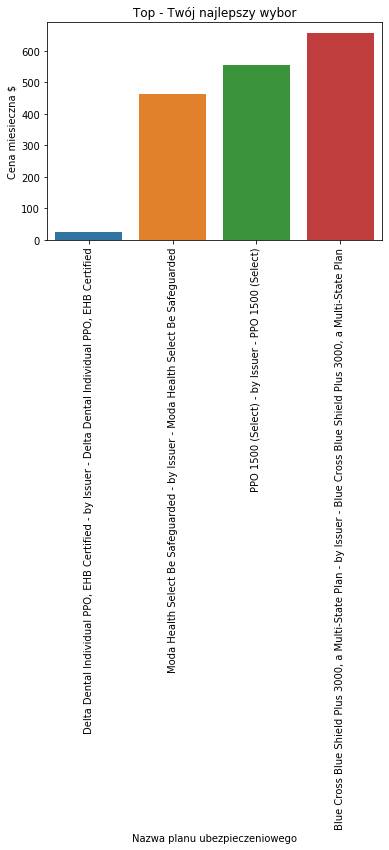

In [14]:
f.best_healthcare(network_df, pa_df, rate2016_df, rate2015_df, rate2014_df, bcs_df)